In [60]:
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
from jax import jacfwd
import jax_cosmo as jc
import numpy
import matplotlib.pyplot as plt
import scipy

In [18]:
jax.config.update("jax_enable_x64", True)
jax.config.update("jax_platform_name", "cpu")
jax.config.update("jax_debug_nans", True)

In [19]:
def single(a,b):
    return jnp.sum(a)+jnp.sum(b)

In [20]:
def multi(a,b):
    return vmap(single,(0,0))(a,b)

In [24]:
def multi2(a,b):
    ans=0.
    for a_,b_ in zip(a,b):
        ans += single(a_,b_)
    return ans

In [21]:
a=numpy.array([1,3,5])
b=numpy.array([3,2])
a_=[a,numpy.array([4,6,7,8])]
b_=[b,numpy.array([3,1,1])]

In [22]:
single(a,b)

Array(14, dtype=int64)

In [25]:
multi2(a_,b_)

Array(44., dtype=float64, weak_type=True)

In [34]:
mat=numpy.zeros((2,2))+4
mat[range(2),range(2)]=mat[range(2),range(2)]+[.1,.2]
print(mat)

[[4.1 4. ]
 [4.  4.2]]


In [87]:
dm_int=0.1
dm_obs=numpy.array([0.02,0.03])

In [88]:
cov = (numpy.zeros((2,2))+dm_int**2)+numpy.identity(2)*dm_obs**2

In [89]:
cov

array([[0.0104, 0.01  ],
       [0.01  , 0.0109]])

In [90]:
L= scipy.linalg.cholesky(cov)

In [170]:
data_=[]
for i in range(100000):
    data=numpy.zeros(2)+numpy.random.normal(0,dm_int) + numpy.random.normal(0,dm_obs)
    x = scipy.linalg.solve_triangular(L, data)
    data_.append(numpy.dot(x,x))

(0.0, 1.0)

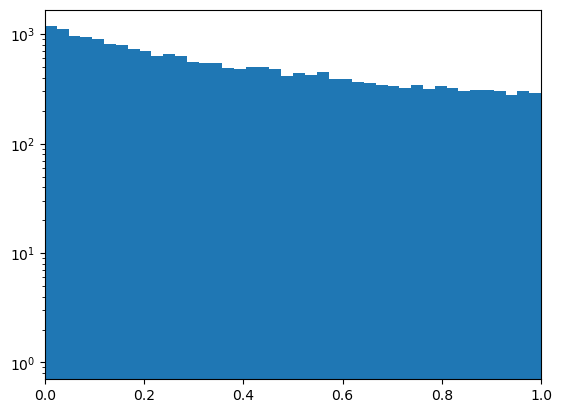

In [171]:
plt.hist(data_,log=True,bins=10000)
plt.xlim(0,1)

In [168]:
x = scipy.linalg.solve_triangular(L, data)

In [123]:
numpy.dot(x,x)

16.030081395810242

In [132]:
data = numpy.random.normal(size=2)
print(data)

[-0.04093584  1.62291939]


In [133]:
data = numpy.dot(L,data)

In [134]:
data

array([0.15496569, 0.05816792])

In [135]:
x = scipy.linalg.solve_triangular(L, data)

In [136]:
x

array([-0.04093584,  1.62291939])